1. 대부분의 데이터는 시계열(series)이나 표(table)의 형태로 나타낼 수 있다.<br>
2. 판다스 패키지는 이런 데이터를 다루기 위한 시리즈(`Series`)클래스와 데이터 프레임(`DataFrame`)클래스를 제공한다.

# pandas pakage import
판다스 패키지를 사용하기 위해 import를 해야한다. <br>
판다스 패키지는 `pd`라는 별칭으로 import하는 것이 관례다.

In [1]:
import pandas as pd

# Series Class

시리즈 `Series`클래스는 넘파이에서 제공하는 1차원 배열과 비슷하지만 각 데이터의 의미를 표시하는 인덱스(index)를 붙일 수 있다. 데이터 자체는 값(value)라고 한다.<br>
> 시리즈 = 값(value) + 인덱스(index)

## Series 생성

데이터를 리스트나 1차원 배열 형식으로 `Series`클래스 생성자에 넣어주면 시리즈 클래스 객체를 만들 수 있다.<br>
이 때, 인덱스의 길이는 데이터의 길이와 같아야 한다. 

- '서울','부산'등의 문자열이 인덱스의 값이고, 인덱스의 값을 인덱스 라벨(label)이라고도 한다.
- 인덱스 라벨은 문자열 뿐만 아니라 날짜, 시간, 정수 등도 가능하다.

In [2]:
# 각 도시의 2015년 인구 데이터를 시리즈로 만든다.
s = pd.Series([9900000,3448700,3890000,2466000],
             index = ['서울','부산','대구','인천'])
s

서울    9900000
부산    3448700
대구    3890000
인천    2466000
dtype: int64

만약 인덱스를 지정하지 않고 시리즈를 만들면 시리즈의 인덱스는 0부터 시작하는 정수값이 된다.

In [3]:
pd.Series(range(10,14))

0    10
1    11
2    12
3    13
dtype: int64

시리즈의 인덱스는 `index`속성으로 접근할 수 있다. <br>
시리즈의 값은 1차원 배열이며 `values`속성으로 접근할 수 있다.

In [4]:
s.index

Index(['서울', '부산', '대구', '인천'], dtype='object')

In [5]:
s.values

array([9900000, 3448700, 3890000, 2466000])

`name`속성을 이용하여 시리즈 데이터에 이름을 붙일 수 있다. <br>
`index.name`속성으로 시리즈의 인덱스에도 이름을 붙일 수 있다.

In [6]:
s.name = '인구'
s.index.name = '도시'
s

도시
서울    9900000
부산    3448700
대구    3890000
인천    2466000
Name: 인구, dtype: int64

## 시리즈 연산

넘파이 배열처럼 시리즈도 벡터화 연산을 할 수 있다. <br>
다만 연산은 시리즈의 값에만 적용되며 인덱스 값은 변하지 않는다. <br>
예를 들어, 인구 숫자를 백만 단위로 만들기 위해 시리즈 객체를 1,000,000으로 나누어도 인덱스 라벨에는 영향을 미치지 않는다.

In [7]:
s /1000000

도시
서울    9.9000
부산    3.4487
대구    3.8900
인천    2.4660
Name: 인구, dtype: float64

## Series indexing
시리즈는 넘파이 배열에서 가능한 인덱스 방법 이외에도<br>
인덱스 라벨을 이용한 인덱싱도 할 수 있다. <br>
배열 인덱싱이나 인덱스 라벨을 이용한 슬라이싱(slicing)도 가능하다.

In [8]:
s[1], s['부산']

(3448700, 3448700)

In [9]:
s[3], s['대구']

(2466000, 3890000)

배열 인덱싱을 하면 부분적인 값을 가지는 시리즈 자료형을 반환한다.<br> 
자료의 순서를 바꾸거나 특정한 자료만 선택할 수 있다. 

In [10]:
s[[0,3,1]]

도시
서울    9900000
인천    2466000
부산    3448700
Name: 인구, dtype: int64

In [11]:
s[['서울','대구','부산']]

도시
서울    9900000
대구    3890000
부산    3448700
Name: 인구, dtype: int64

In [12]:
# 인구가 250만 초과, 500만 미만일 경우
s[(250e4<s) & (s <500e4)]

도시
부산    3448700
대구    3890000
Name: 인구, dtype: int64

슬라이싱을 해도 부분적인 시리즈를 반환한다.<br>
이 때, 문자열 라벨을 이용한 슬라이싱을 하는 경우에는 숫자 인덱싱과 달리 콜론(:)기호 뒤에 오는 값도 결과에 포함되므로 주의해야한다.

In [13]:
# 두 번째(1)부터 세번째(2)까지
s[1:3]

도시
부산    3448700
대구    3890000
Name: 인구, dtype: int64

In [14]:
s['부산':'인천']

도시
부산    3448700
대구    3890000
인천    2466000
Name: 인구, dtype: int64

만약 라벨 값이 영문 문자열인 경우에는 인덱스 라벨이 속성인것처럼 점(.)을 이용하여 해당 인덱스 값에 접근할 수도 있다.

In [15]:
s0 = pd.Series(range(3), index = ['a','b','c'])
s0

a    0
b    1
c    2
dtype: int64

In [16]:
s0.a

0

In [17]:
s0.b

1

## 시리즈와 딕셔너리 자료형
시리즈 객체는 라벨 값에 의해 인덱싱이 가능하므로 실질적으로 인덱스 라벨 값을 키(key)로 가지는 딕셔너리 자료형과 같다고 볼 수 있다.<br>
키가 인덱스 역할을 한다.<br>
따라서 딕셔너리 자료형에서 제공하는 in 연산도 가능하고 items메서드를 사용하면 for 루프를 통해 각 원소의 키(key)와 값(value)을 접근할수도 있다.

In [18]:
s = pd.Series([9900000,3448700,3890000,2466000],
             index = ['서울','부산','대구','인천'])
s

서울    9900000
부산    3448700
대구    3890000
인천    2466000
dtype: int64

In [19]:
# 인덱스 라벨 중에 서울이 있는가
"서울" in s

True

In [20]:
# 인덱스 라벨 중에 대전이 있는가
"대전" in s

False

In [21]:
for k,v in s.items():
    print(f'{k} = {v}')

서울 = 9900000
부산 = 3448700
대구 = 3890000
인천 = 2466000


딕셔너리 객체에서 시리즈를 만들 수도 있다. <br>
이번에는 2010년의 인구 자료를 `s2`라는 이름의 시리즈로 만들어 본다.

In [22]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158})
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

딕셔너리의 원소는 순서를 가지지 않기 때문에 시리즈의 데이터도 순서가 보장되지 않는다. <br>
만약 순서를 정하고 싶다면, 인덱스를 리스트로 지정해야 한다. 

In [23]:
s2 = pd.Series({'서울': 9631482, '부산':3393191,'인천':2632035, '대전': 1490158},
              index = ['부산','대전','인천','서울'])
s2

부산    3393191
대전    1490158
인천    2632035
서울    9631482
dtype: int64

## 인덱스 기반 연산
2015년도와 2010년의 인구 증가를 계산해 본다. <br>
두 개의 시리즈의 차이를 구하면 된다.<br>
두 시리즈에 대해 연산을 하는 경우 인덱스가 같은 데이터에 대해서만 차이를 구한다.

In [24]:
ds = s-s2
ds

대구         NaN
대전         NaN
부산     55509.0
서울    268518.0
인천   -166035.0
dtype: float64

대구와 대전의 경우에는 2010년 자료와 2015년 자료가 모두 존재하지 않기 때문에 계산이 불가능하다. (`NaN`(Not a Number))이라는 값을 가지게 된다.) <br>
또한 `NaN`값이 `float`자료형에서만 가능하므로 다른 계산 결과 모두 `float`자료형이 되었다는 점에 주의한다. <br>
`NaN`이 아닌 값을 구하려면 `notnull`메서드를 사용한다.

In [25]:
s.values - s2.values

array([ 6506809,  1958542,  1257965, -7165482])

values를 사용하여 시리즈 연산을 한다면, 시리즈의 형태는 사라지고 array형태로 변환된다.<br> 동일한 위치에 있는 값끼리 연산이 되기 때문에 위와 같은 결과가 나타나진다.

In [26]:
# `NaN`이 아닌 값을 구하려면 `notnull`메서드를 사용한다.
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [27]:
# `NaN`이 아닌 값 추출
ds[ds.notnull()]

부산     55509.0
서울    268518.0
인천   -166035.0
dtype: float64

In [28]:
# 인구 증가율(%) 
rs = (s-s2) / s2 *100
rs = rs[rs.notnull()]
rs

부산    1.635894
서울    2.787920
인천   -6.308237
dtype: float64

## 데이터의 갱신, 추가, 삭제
인덱싱을 이용하면 딕셔너리처럼 데이터를 갱신(update)하거나 추가(add)할 수 있다.

In [29]:
rs['부산'] = 1.63
rs

부산    1.630000
서울    2.787920
인천   -6.308237
dtype: float64

In [30]:
rs['대구'] = 1.41
rs

부산    1.630000
서울    2.787920
인천   -6.308237
대구    1.410000
dtype: float64

데이터 삭제 = del 명령어 사용

In [31]:
del rs['서울']
rs

부산    1.630000
인천   -6.308237
대구    1.410000
dtype: float64

## 연습문제

1. 임의로 두 개의 시리즈 객체를 만든다. 모두 문자열 인덱스를 가져야하며 두 시리즈에 공통적으로 포함되지 않는 라벨이 있어야 한다.

In [32]:
a = pd.Series(range(90,94),index = ['국','수','사','과'])
b = pd.Series(range(95,99),index = ['국','수','사','영'])

2. 위에서 만든 두 시리즈 객체를 이용하여 사칙 연산을 한다.

In [33]:
print(f'1. a + b\n{a+b}\n\n2. a - b\n{a-b}\n\n3. a * b\n{a*b}\n\n4. a / b\n{a/b}')

1. a + b
과      NaN
국    185.0
사    189.0
수    187.0
영      NaN
dtype: float64

2. a - b
과    NaN
국   -5.0
사   -5.0
수   -5.0
영    NaN
dtype: float64

3. a * b
과       NaN
국    8550.0
사    8924.0
수    8736.0
영       NaN
dtype: float64

4. a / b
과         NaN
국    0.947368
사    0.948454
수    0.947917
영         NaN
dtype: float64


# 데이터프레임 클래스
시리즈가 1차원 벡터 데이터에 행방향 인덱스(row index)를 붙인 것이라면 데이터프레임 `DataFrame`클래스는 2차원 행렬 데이터에 인덱스를 붙인 것과 비슷하다.<br>
2차원이므로 각각의 열 데이터의 이름이 되는 열 인덱스(column index)도 붙일 수 있다. 

## 데이터 프레임 생성
1. 하나의 열이 되는 데이터를 리스트나 일차원 배열을 준비
2. 이 각각의 열에 대한 이름(라벨)을 키로 가지는 딕셔너리를 만든다. 
3. 이 데이터를 `DataFrame`클래스 생성자에 넣는다. 동시에 열방향 인덱스는 `colums`인수로, 행방향 인덱스는 `index`인수로 지정한다.

In [34]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


배열 데이터는 모든 원소가 같은 자료형을 가져야하지만, 데이터프레임은 각 열마다 자료형이 다를 수 있기때문에 딕셔너리를 사용<br>
시리즈와 마찬가지로 데이터만 접근하려면 `values`속성을 사용한다. <br>
열방향 인덱스와 행방향 인덱스는 `columns`,`index`속성으로 접근

In [35]:
df.values


array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [36]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [37]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

시리즈에서처럼 열방향 인덱스와 행방향 인덱스에 이름을 붙이는 것도 가능하다!

In [38]:
df.index.name = '도시'
df.columns.name = '특성'
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


### 연습문제 
다음 조건을 만족하는 임의의 데이터프레임을 하나 만든다.

1. 열의 갯수와 행의 갯수가 각각 5개 이상이어야 한다.

In [39]:
data = {
    "국어" : [90, 75, 88, 100, 98],
    "수학" : [98, 80, 90, 91, 89],
    "영어" : [80, 90, 98, 89, 70],
    "과학" : [97, 85, 79, 100, 98],
    "이름" : ['김','홍','성','이','박']
}

In [40]:
data['이름'].sort()

columns = ['이름','국어','수학','과학','영어']
index = data['이름']
df2 = pd.DataFrame(data, index=index,columns = columns)
df2

,이름,국어,수학,과학,영어
김,김,90,98,97,80
박,박,75,80,85,90
성,성,88,90,79,98
이,이,100,91,100,89
홍,홍,98,89,98,70


2. 열에는 정수, 문자열, 실수 자료형 데이터가 각각 1개 이상씩 포함되어 있어야 한다.

In [41]:
data = {
    "국어" : [90, 75, 88, 100, 98],
    "수학" : [98, 80, 90, 91, 89],
    "영어" : [80, 90, 98, 89, 70],
    "이름" : ['김','홍','성','이','박']
}
columns = ['국어','수학','영어','이름']
index = data['이름']
df2 = pd.DataFrame(data, index=index,columns = columns)
df2

,국어,수학,영어,이름
김,90,98,80,김
홍,75,80,90,홍
성,88,90,98,성
이,100,91,89,이
박,98,89,70,박


In [42]:
score_sum = {}
for i in range(len(data)-1):
    a = columns[i]
    score_sum[a] = sum(data[a])

In [43]:
score_sum

{'국어': 451, '수학': 448, '영어': 427}

- 데이터 프레임은 전치(transpose)를 포함하여 넘파이 2차원 배열이 가지는 대부분의 속성이나 메서드를 지원

In [44]:
df.T

도시,서울,부산,인천,대구
특성,,,,
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


## 열 데이터의 갱신, 추가, 삭제
데이터프레임은 열 시리즈의 딕셔너리로 볼 수 있으므로 열 단위로 데이터를 갱신하거나 추가, 삭제 할 수 있다. 

In [45]:
# '2010-2015 증가율'이라는 이름의 열 추가
df['2010-2015 증가율'] = df['2010-2015 증가율'] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [46]:
# '2015-2010 증가율'이라는 이름의 열 추가
df['2015-2010 증가율'] = ((df['2010']-df['2005'])/df['2005']*100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2015-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [47]:
# '2015-2010 증가율'이라는 이름의 열 삭제
del df['2010-2015 증가율']
df

특성,지역,2015,2010,2005,2000,2015-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


## 열 인덱싱
열 라벨 = 키<br>
데이터프레임은 열 시리즈를 값으로 가지는 딕셔너리와 비슷하다.<br>
데이터프레임을 인덱싱을 할 때도 열 라벨을 키값으로 생각하여 인덱싱을 할 수 있다.<br>
인덱스로 라벨 값을 하나 넣으면 시리즈 객체가 반환되고 라벨의 배열 또는 리스트를 넣으면 부분적인 데이터 프레임이 반환된다.

In [48]:
# 하나의 열만 인덱싱 -> 시리즈 반환
df['지역']

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [49]:
# 여러개의 열을 인덱싱 -> 부분적인 데이터 프레임이 반환
df[['2010','2015']]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [50]:
# 하나의 열만 빼내면서 데이터프레임 자료형을 유지하고 싶다면 원소가 하나인 리스트를 써서 인덱싱 하면 된다.

In [51]:
# 2010이라는 열을 반환하면서 데이터프레이미 자료형 유지
df[['2010']]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [52]:
type(df[['2010']])

pandas.core.frame.DataFrame

In [53]:
# 2010이라는 열을 반환하면서 시리즈 자료형으로 변환
df['2010']

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [54]:
type(df['2010'])

pandas.core.series.Series

데이터프레임의 열 인덱스가 문자열 라벨을 가지고 있는 경우에는 순서를 나타내는 정수 인덱스를 열 인덱싱에 사용할 수 없다.<br>
정수 인덱싱의 슬라이스는 뒤에서 설명하겠지만 행(row)을 인덱싱할 때 사용하므로 열을 인덱싱할 때는 쓸 수 없다. <br>
정수 인데스를 넣으면 `keyerror` 오류가 발생한다.

```python
df[0]

...결과...
Key Error 0
```

원래부터 정수형 열 인덱스를 가지는 경우에는 인덱스 값으로 정수를 사용할 수 있다. 

In [55]:
import numpy as np

In [56]:
df2 = pd.DataFrame(np.arange(12).reshape(3,4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [57]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int64

In [58]:
df2[[1,2]]

,1,2
0,1,2
1,5,6
2,9,10


## 행 인덱싱
행 단위로 인덱싱으르 하고자하면 항상 슬라이싱(slicing)을 해야한다. <br>
인덱스의 값이 문자 라벨이면 라벨 슬라이싱도 가능

In [59]:
df[:1]

특성,지역,2015,2010,2005,2000,2015-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [60]:
df[1:2]

특성,지역,2015,2010,2005,2000,2015-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


In [61]:
df[1:3]

특성,지역,2015,2010,2005,2000,2015-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54


In [62]:
df['서울':'부산']

특성,지역,2015,2010,2005,2000,2015-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40


## 개별 데이터 인덱싱
데이터프레임에서 열 라벨로 시리즈를 인덱싱하면 시리즈가 된다.<br>
이 시리즈를 다시 행 라벨로 인덱싱하면 개별 데이터가 나온다.

In [63]:
df['2015']['서울']

9904312

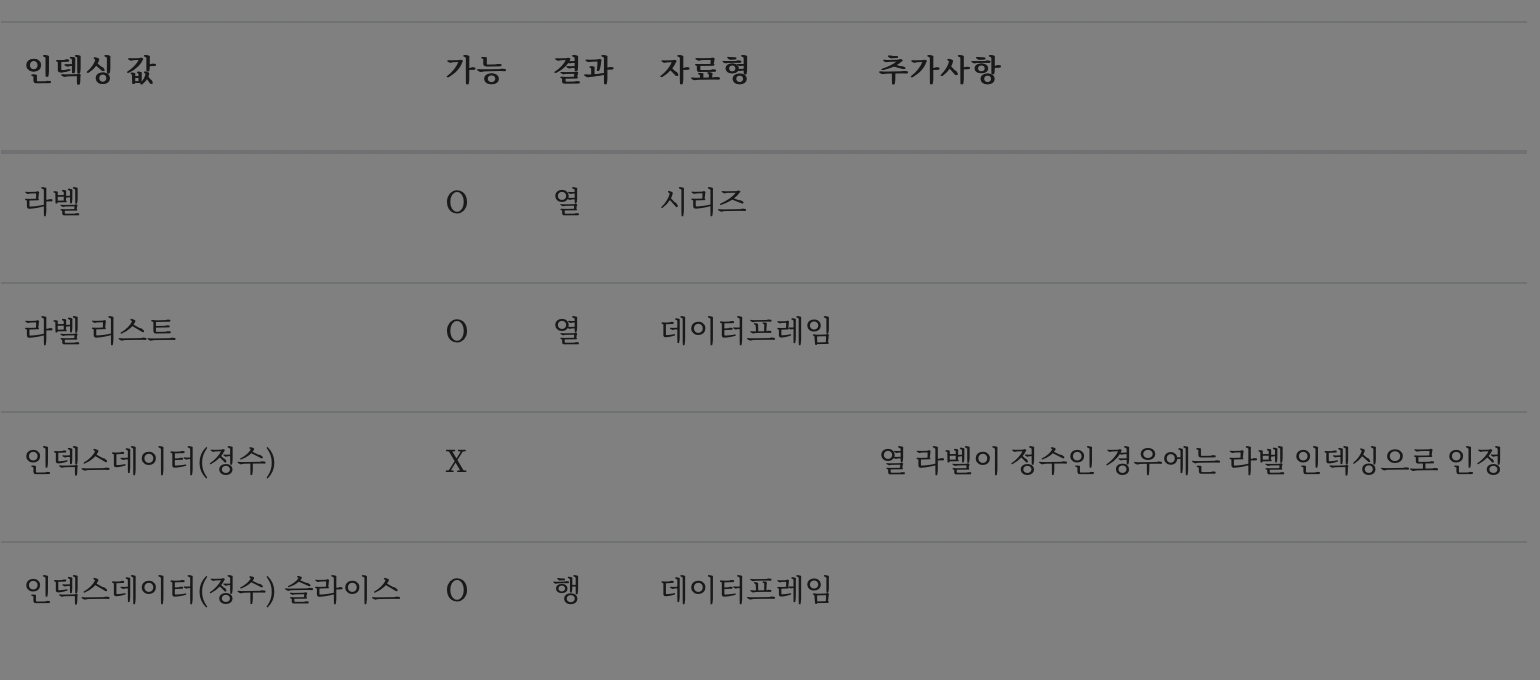

## 연습문제
다음 데이터프레임에서 지정하는 데이터를 뽑아내거나 처리하라.
```python
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)
```

In [64]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)


1) 모든 학생의 수학 점수를 시리즈로 나타낸다.

In [65]:
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

2)모든 학생의 국어와 영어 점수를 데이터 프레임으로 나타낸다.

In [66]:
df[['국어','영어']]

,국어,영어
춘향,80,90
몽룡,90,70
향단,70,60
방자,30,40


3)모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.

In [67]:
df = df.T

df['평균']= [np.mean(i) for i in df.values]
df

,춘향,몽룡,향단,방자,평균
국어,80,90,70,30,67.5
영어,90,70,60,40,65.0
수학,90,60,80,70,75.0


4) 방자의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산

In [68]:
df['방자'].영어 = 80
df['평균'].영어 = df[1:2][['춘향','몽룡','향단','방자']].values.mean()
df

/Users/iyujin/miniforge3/envs/tf/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,춘향,몽룡,향단,방자,평균
국어,80,90,70,30,67.5
영어,90,70,60,80,75.0
수학,90,60,80,70,75.0


5) 춘향의 점수를 데이터프레임으로 나타낸다.

In [69]:
df[['춘향']]

,춘향
국어,80
영어,90
수학,90


6) 향단의 점수를 시리즈로 나타낸다.

In [70]:
df.향단

국어    70
영어    60
수학    80
Name: 향단, dtype: int64

참고) https://datascienceschool.net/01%20python/04.01%20판다스%20패키지의%20소개.html